In [23]:
import numpy as np 
import yfinance as yf 
import pandas as pd 


In [24]:
stock = yf.download(
    "AAPL",
    start = "2020-01-01",
    end = "2020-12-01"
)
stock

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337997,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988480,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269157,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852982,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505646,108872000
...,...,...,...,...,...,...
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.152443,127959300
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.464355,113874200
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.319084,76499200


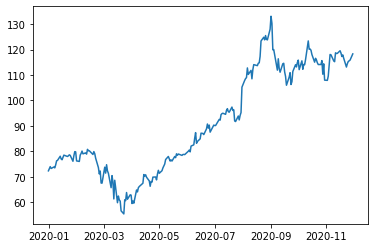

In [25]:
import matplotlib.pyplot as plt 
plt.plot(stock['Adj Close'])

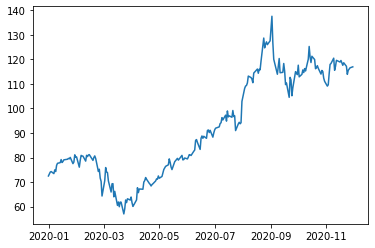

In [26]:
plt.plot(stock['Open'])

In [27]:
stock['pct_rel'] = stock['Adj Close'].pct_change()
stock.head()

,Open,High,Low,Close,Adj Close,Volume,pct_rel
Date,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.337997,100805600,NaN
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.988480,135480400,0.022816
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.269157,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.852982,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.505646,108872000,-0.004703


In [28]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_rel
Date,,,,,,,
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.152443,127959300,-0.029743
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.464355,113874200,0.011594
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.319084,76499200,0.007467
2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300,0.004826
2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200,0.021100


In [29]:
stock["state"] = stock['pct_rel'].apply(
    lambda x : 
    "Up" 
    if (x>0.001) 
    else ("Down" if(x<-0.001) else "Flat")
)

In [30]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_rel,state
Date,,,,,,,,
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.152443,127959300,-0.029743,Down
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.464355,113874200,0.011594,Up
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.319084,76499200,0.007467,Up
2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300,0.004826,Up
2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200,0.021100,Up


In [31]:
stock["state"].value_counts()

Up      118
Down     99
Flat     15
Name: state, dtype: int64

In [32]:
stock["priorstate"] = stock["state"].shift(1)


In [33]:
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,pct_rel,state,priorstate
Date,,,,,,,,,
2020-11-23,117.180000,117.620003,113.750000,113.849998,113.152443,127959300,-0.029743,Down,Down
2020-11-24,113.910004,115.849998,112.589996,115.169998,114.464355,113874200,0.011594,Up,Down
2020-11-25,115.550003,116.750000,115.169998,116.029999,115.319084,76499200,0.007467,Up,Up
2020-11-27,116.570000,117.489998,116.220001,116.589996,115.875641,46691300,0.004826,Up,Up
2020-11-30,116.970001,120.970001,116.809998,119.050003,118.320580,169410200,0.021100,Up,Up


In [34]:
stock[["priorstate", "state"]]

,priorstate,state
Date,,
2019-12-31,NaN,Flat
2020-01-02,Flat,Up
2020-01-03,Up,Down
2020-01-06,Down,Up
2020-01-07,Up,Down
...,...,...
2020-11-23,Down,Down
2020-11-24,Down,Up
2020-11-25,Up,Up


In [35]:
states = stock[["priorstate", "state"]].dropna()

In [36]:
states

,priorstate,state
Date,,
2020-01-02,Flat,Up
2020-01-03,Up,Down
2020-01-06,Down,Up
2020-01-07,Up,Down
2020-01-08,Down,Up
...,...,...
2020-11-23,Down,Down
2020-11-24,Down,Up
2020-11-25,Up,Up


In [37]:
states["priorstate"].isna().sum()

0

In [38]:
states["state"].isna().sum()

0

In [39]:
state_mat = states.groupby(["priorstate", "state"]).size().unstack()
state_mat 

state,Down,Flat,Up
priorstate,,,
Down,32,9,58
Flat,6,1,8
Up,61,4,52


In [40]:
# INitial transition matrix 
transition_matrix = state_mat.apply(lambda x: x/float(x.sum()), axis = 1)
transition_matrix

state,Down,Flat,Up
priorstate,,,
Down,0.323232,0.090909,0.585859
Flat,0.400000,0.066667,0.533333
Up,0.521368,0.034188,0.444444


In [41]:
df = pd.DataFrame(transition_matrix)

In [42]:
df 

state,Down,Flat,Up
priorstate,,,
Down,0.323232,0.090909,0.585859
Flat,0.400000,0.066667,0.533333
Up,0.521368,0.034188,0.444444


In [43]:
df.to_csv("Initial_Mat.csv")

In [48]:
i = 1
a = transition_matrix.copy()
b = transition_matrix.dot(transition_matrix)
while (not(a.equals(b))):
    i += 1
    a = b.copy() 
    print(i)
    b = b.dot(transition_matrix)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [49]:
a

state,Down,Flat,Up
priorstate,,,
Down,0.429022,0.060487,0.510491
Flat,0.429022,0.060487,0.510491
Up,0.429022,0.060487,0.510491


In [50]:
b

state,Down,Flat,Up
priorstate,,,
Down,0.429022,0.060487,0.510491
Flat,0.429022,0.060487,0.510491
Up,0.429022,0.060487,0.510491


In [51]:
days = 365 
test = transition_matrix.copy()
for i in range(days):
    test = test.dot(transition_matrix)
    

In [52]:
test

state,Down,Flat,Up
priorstate,,,
Down,0.429022,0.060487,0.510491
Flat,0.429022,0.060487,0.510491
Up,0.429022,0.060487,0.510491
